In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from utils import construct, sweep

In [47]:
""" If they begin by both cooperating for any learning rate >0 and <1 they will start with defection and eventually cooperate
for any precision

higher learning rate makes the initial defection period shorter"""

' If they begin by both cooperating'

In [84]:

agent_1, agent_2, D = construct(precision_prosocial = 5.0, precision_antisocial=5.0, lr_pB = 1.0)
actions_over_time, B1_over_time, B2_over_time, q_pi_over_time = sweep(agent_1, agent_2, observation_1 = [0], observation_2 = [0],D=D,T=200)


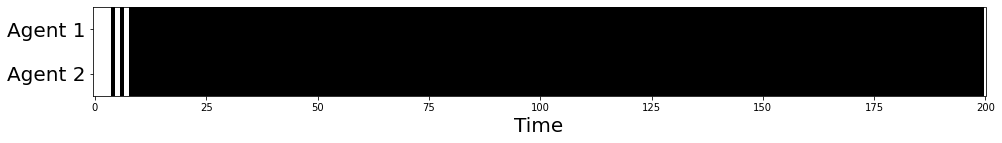

In [85]:

fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time.T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.show()

In [ ]:
""" If they begin by one cooperating and one defecting they start with defection and end up oscillating for equal precisions

higher learning rate makes the initial defection period shorter


but we get cooperation for pp = 4.0, pa-4.0, lr = 0.4"""

In [566]:

agent_1, agent_2, D = construct(precision_prosocial = 100.0, precision_antisocial=100.0, lr_pB = 0.9)
actions_over_time, B1_over_time, B2_over_time, q_pi_over_time = sweep(agent_1, agent_2, observation_1 = [0], observation_2 = [1],D=D,T=400)


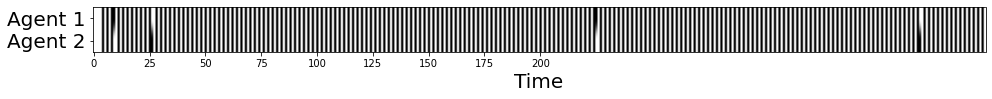

In [567]:

fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time.T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.show()

In [377]:
""" If they begin by both defecting for any learning rate >0 and <1 they will start with defection and eventually cooperate
for any precision

higher learning rate makes the initial defection period shorter"""

' If they begin by both defecting for any learning rate >0 and <1 they will start with defection and eventually cooperate\nfor any precision\n\nhigher learning rate makes the initial defection period shorter'

In [357]:

agent_1, agent_2, D = construct(precision_prosocial = 2.0, precision_antisocial=2.0, lr_pB = 0.8)
actions_over_time, B1_over_time, B2_over_time, q_pi_over_time = sweep(agent_1, agent_2, observation_1 = [1], observation_2 = [1],D=D,T=200)


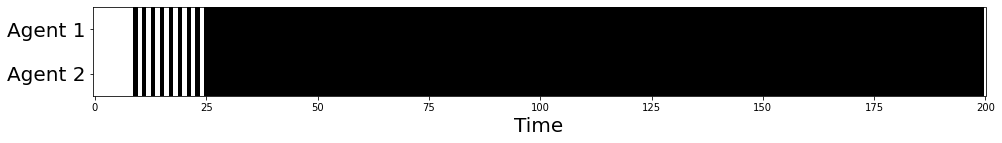

In [358]:

fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time.T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.show()

In [121]:
actions_over_time_all = np.load('lr_01/actions_over_time_all.npy')
B1_over_time_all = np.load('lr_01/B1_over_time_all.npy')
B2_over_time_all = np.load('lr_01/B2_over_time_all.npy')
q_pi_over_time_all = np.load('lr_01/q_pi_over_time_all.npy')

In [4]:
q_pi_over_time_all.shape

(300, 2, 2, 16, 200)

In [5]:
B1_over_time_all.shape

(300, 4, 4, 2, 2, 16, 200)

In [6]:
import matplotlib.pyplot as plt

In [7]:
from matplotlib.colors import LinearSegmentedColormap

cmap0 = LinearSegmentedColormap.from_list("", ["white", "black"])


In [8]:
def is_oscillatory(vector):
    if (vector == np.zeros(vector.shape[0])).all() == True:
        return 0 
    if (vector == np.ones(vector.shape[0])).all() == True:
        return 1
    if ((vector == np.zeros(50))[::2]).all() == True or ((vector == np.ones(50))[::2]).all() == True:
        return 2
    

In [9]:
steady_state = np.zeros((15,3))


In [10]:
actions_over_time_all.shape

(300, 2, 16, 200)

In [11]:
oscillations = []

num_oscillations = []
num_c = []
num_d = []

indices = {}
for k in range(15):
    num = 0
    c = 0
    d = 0
    c_indices = []
    d_indices = []
    o_indices = []
    for i, l in enumerate(range(200)):
        o = is_oscillatory(actions_over_time_all[-50:,0,k,l])
        if o == 2:
            num += 1 
            o_indices.append(i)
        oscillations.append(o)
        if o == 0:
            c += 1
            c_indices.append(i)
        if o == 1:
            d += 1
            d_indices.append(i)
    indices[k] = [c_indices, d_indices, o_indices]

    steady_state[k] = [num,c,d]

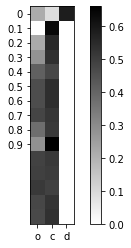

In [12]:
plt.imshow(steady_state/200,cmap=cmap0)
plt.xticks([0,1,2],labels=['o','c','d'])
plt.yticks(range(10), labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

plt.colorbar()

In [ ]:
plt.imshow(steady_state/200,cmap=cmap0)
plt.xticks([0,1,2],labels=['o','c','d'])
plt.yticks(range(10), labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

plt.colorbar()

([<matplotlib.axis.XTick at 0x12c259520>,
 [Text(0, 0, '0'),
  Text(1, 0, '0.1'),
  Text(2, 0, '0.2'),
  Text(3, 0, '0.3'),
  Text(4, 0, '0.4'),
  Text(5, 0, '0.5'),
  Text(6, 0, '0.6'),
  Text(7, 0, '0.7'),
  Text(8, 0, '0.8'),
  Text(9, 0, '0.9'),
  Text(10, 0, '1.1'),
  Text(11, 0, '1.2'),
  Text(12, 0, '1.3'),
  Text(13, 0, '1.4'),
  Text(14, 0, '1.5')])

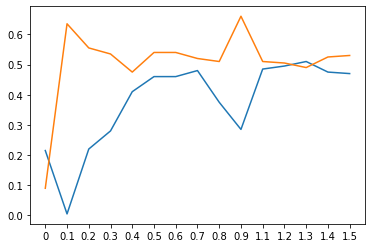

In [27]:
plt.plot(steady_state[:,0]/200)
plt.plot(steady_state[:,1]/200)
plt.xticks(range(15), labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.1,1.2,1.3,1.4,1.5])

In [16]:
B1_over_time_all.shape

(300, 4, 4, 2, 2, 16, 200)

In [83]:
B1_over_time_all = np.mean(B1_over_time_all,axis=-1)

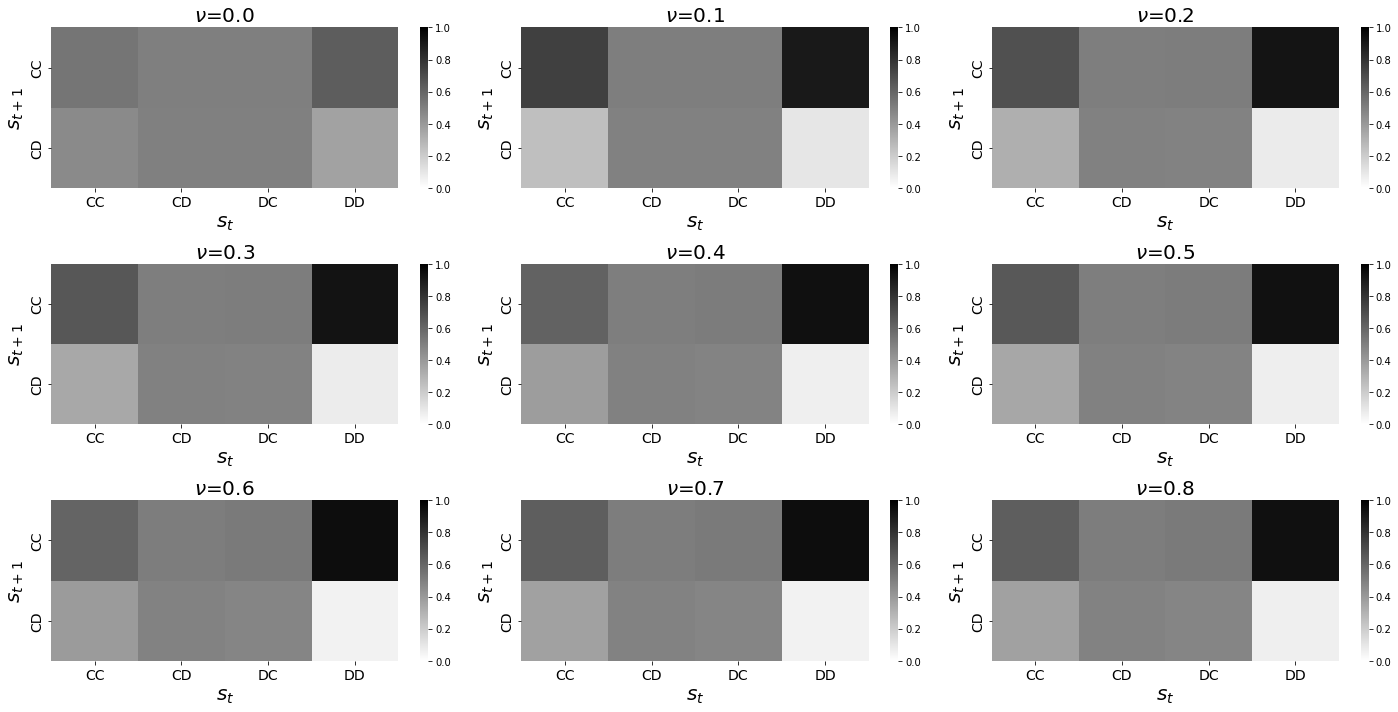

In [86]:
def set_labels(axis):
    axis.set_xticklabels(['CC','CD','DC','DD'],fontsize =14)
    axis.set_yticklabels(['CC','CD'],fontsize =14)
    axis.set_xlabel(r'$s_t$',fontsize =20)

    axis.set_ylabel(r'$s_{t+1}$',fontsize =20)

fig, ax = plt.subplots(3,3, figsize = (20,10))

img1 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,0],ax =ax[0,0], cmap = cmap0, vmin = 0, vmax =1)
img2 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,1],ax =ax[0,1], cmap = cmap0, vmin = 0, vmax =1)
img3 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,2],ax =ax[0,2], cmap = cmap0, vmin = 0, vmax =1)
img4 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,3],ax =ax[1,0], cmap = cmap0, vmin = 0, vmax =1)
img5 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,4],ax =ax[1,1], cmap = cmap0, vmin = 0, vmax =1)
img6 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,5],ax =ax[1,2], cmap = cmap0, vmin = 0, vmax =1)
img7 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,12],ax =ax[2,0], cmap = cmap0, vmin = 0, vmax =1)
img8 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,13],ax =ax[2,1], cmap = cmap0, vmin = 0, vmax =1)
img9 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,14],ax =ax[2,2], cmap = cmap0, vmin = 0, vmax =1)


ax[0,0].set_title(r'$\nu$' + '=0.0',fontsize =20)
ax[0,1].set_title(r'$\nu$' + '=0.1',fontsize =20)

ax[0,2].set_title(r'$\nu$' + '=0.2',fontsize =20)
ax[1,0].set_title(r'$\nu$' + '=0.3',fontsize =20)
ax[1,1].set_title(r'$\nu$' + '=0.4',fontsize =20)
ax[1,2].set_title(r'$\nu$' + '=0.5',fontsize =20)
ax[2,0].set_title(r'$\nu$' + '=0.6',fontsize =20)
ax[2,1].set_title(r'$\nu$' + '=0.7',fontsize =20)
ax[2,2].set_title(r'$\nu$' + '=0.8',fontsize =20)

set_labels(ax[0,0])
set_labels(ax[0,1])
set_labels(ax[0,2])
set_labels(ax[1,0])
set_labels(ax[1,1])
set_labels(ax[1,2])
set_labels(ax[2,0])
set_labels(ax[2,1])
set_labels(ax[2,2])
fig.tight_layout()
plt.savefig("Learned Transitions A matrix precision")



In [18]:
indices

{0: [[18,
   25,
   47,
   48,
   52,
   55,
   63,
   82,
   86,
   88,
   93,
   100,
   128,
   140,
   163,
   165,
   180,
   186],
  [0,
   3,
   4,
   6,
   7,
   10,
   11,
   12,
   13,
   19,
   21,
   22,
   23,
   24,
   28,
   29,
   32,
   34,
   35,
   37,
   38,
   39,
   40,
   41,
   44,
   46,
   49,
   50,
   53,
   54,
   56,
   57,
   58,
   59,
   62,
   64,
   65,
   66,
   68,
   69,
   70,
   73,
   76,
   77,
   78,
   79,
   80,
   81,
   85,
   87,
   89,
   90,
   91,
   94,
   95,
   96,
   99,
   101,
   105,
   106,
   107,
   109,
   110,
   114,
   115,
   116,
   120,
   121,
   123,
   124,
   126,
   127,
   130,
   131,
   132,
   133,
   134,
   136,
   138,
   139,
   142,
   143,
   144,
   145,
   146,
   147,
   149,
   152,
   153,
   154,
   155,
   157,
   160,
   161,
   162,
   167,
   172,
   175,
   176,
   177,
   178,
   179,
   181,
   182,
   183,
   184,
   185,
   187,
   189,
   190,
   192,
   194,
   195,
   196,
   197,
   19

ValueError: Must pass 2-d input. shape=(2, 2, 200)

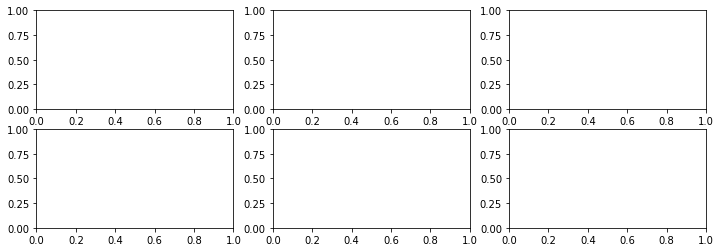

In [89]:
def set_labels(axis):
    axis.set_xticklabels(['Prosocial','Antisocial'])
    axis.set_yticklabels(['PS','AS'])

fig, ax = plt.subplots(2,3, figsize = (12,4))

img1 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,0],ax =ax[0,0], cmap = cmap0, vmin = 0, vmax =1)
img2 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,1],ax =ax[0,1], cmap = cmap0, vmin = 0, vmax =1)
img3 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,2],ax =ax[0,2], cmap = cmap0, vmin = 0, vmax =1)
img4 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,3],ax =ax[1,0], cmap = cmap0, vmin = 0, vmax =1)
img5 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,4],ax =ax[1,1], cmap = cmap0, vmin = 0, vmax =1)
img6 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,5],ax =ax[1,2], cmap = cmap0, vmin = 0, vmax =1)
set_labels(ax[0,0])
set_labels(ax[0,1])
set_labels(ax[0,2])
set_labels(ax[1,0])
set_labels(ax[1,1])
set_labels(ax[1,2])
fig.tight_layout()

fig.suptitle("Learned Transitions given action cooperate")
fig.tight_layout()


In [ ]:
show the B matrices for the two different outcomes 

In [106]:
q_pi_over_time_all = np.mean(q_pi_over_time_all,axis=-1)

In [108]:
q_pi_over_time_all.shape

(300, 2, 2, 16)

In [126]:
c_indices

[18,
 25,
 47,
 48,
 52,
 55,
 63,
 82,
 86,
 88,
 93,
 100,
 128,
 140,
 163,
 165,
 180,
 186,
 0,
 5,
 9,
 10,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 27,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 65,
 66,
 67,
 69,
 70,
 71,
 72,
 74,
 75,
 76,
 77,
 78,
 79,
 81,
 85,
 87,
 88,
 89,
 90,
 91,
 95,
 98,
 99,
 101,
 103,
 104,
 105,
 106,
 107,
 110,
 111,
 112,
 113,
 114,
 116,
 118,
 119,
 121,
 123,
 125,
 126,
 127,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 142,
 144,
 146,
 150,
 151,
 153,
 155,
 156,
 157,
 162,
 163,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 175,
 176,
 177,
 180,
 181,
 182,
 184,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 198,
 199,
 0,
 2,
 3,
 7,
 8,
 10,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 21,
 22,
 24,
 26,
 27,
 28,
 29,
 32,
 34,
 36,
 38,
 39,
 40,
 42,
 47,
 48,
 54,
 58,
 59,
 60,
 61,
 63,
 64,
 67,
 69,
 72,
 74,
 75,
 77,
 78,

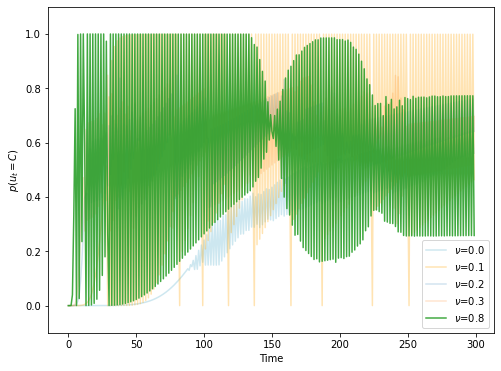

In [25]:
fig = plt.figure(figsize = (8,6))


plt.plot(np.mean(q_pi_over_time_all[:,0,0,0,indices[0][2]],axis=-1),alpha=0.6, label = r'$\nu$' + '=0.0', color = 'lightblue')
plt.plot(np.mean(q_pi_over_time_all[:,0,0,1,indices[1][2]],axis=-1),alpha=0.3, label = r'$\nu$' + '=0.1', color = 'orange')
plt.plot(np.mean(q_pi_over_time_all[:,0,0,2,indices[2][2]],axis=-1),alpha=0.2, label = r'$\nu$' + '=0.2')
plt.plot(np.mean(q_pi_over_time_all[:,0,0,3,indices[3][2]],axis=-1), alpha=0.2,  label = r'$\nu$' + '=0.3')
# plt.plot(q_pi_over_time_all[:,0,0,4,indices[4][0]],alpha=0.3, label =r'$\nu$' + '=0.4', color = 'blue')
# plt.plot(q_pi_over_time_all[:,0,0,5,indices[5][0]],color = 'darkblue', label= r'$\nu$' + '=0.5')
# plt.plot(q_pi_over_time_all[:,0,0,6,indices[6][0]],color = 'purple', label = r'$\nu$' + '=0.6')
# plt.plot(q_pi_over_time_all[:,0,0,7,indices[7][0]], label = r'$\nu$' + '=0.7')
plt.plot(np.mean(q_pi_over_time_all[:,0,0,8,indices[8][2]],axis=-1),alpha=0.9, label = r'$\nu$' + '=0.8')
plt.legend()
#plt.errorbar(range(200), q_pi_over_time_all[:,0,0,i,0], yerr=q_pi_over_time_all[:,0,0,i,1],alpha=0.5, ecolor = 'yellow')
plt.ylim(-0.1,1.1)
plt.xlabel("Time")
plt.ylabel(r'$p(u_t = C)$')
plt.savefig("Probability of cooperation over time")
plt.show()

In [112]:
actions_over_time_all.shape

(300, 2, 16, 200)

In [113]:
actions_over_time_all = np.mean(actions_over_time_all,axis=-1)

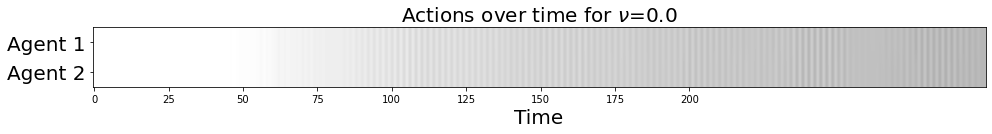

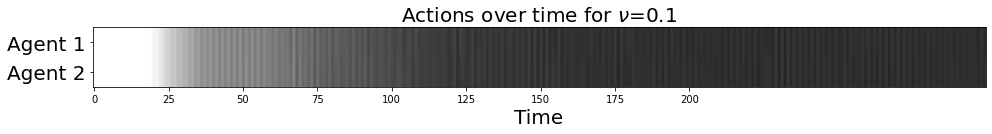

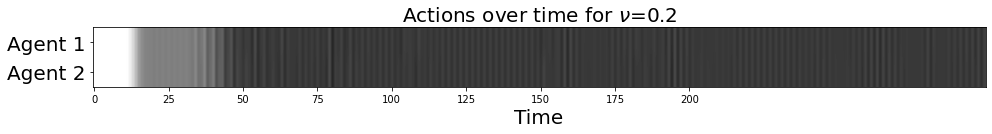

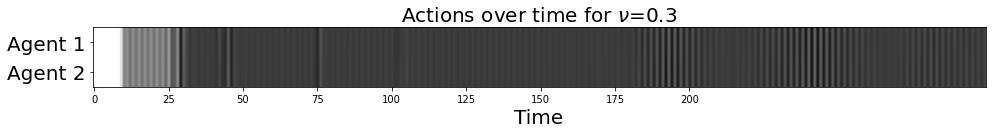

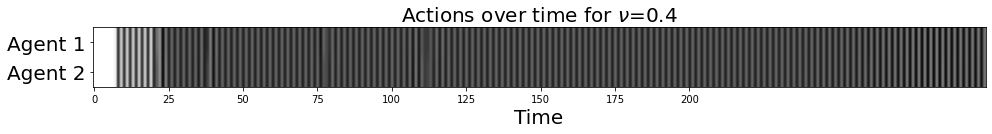

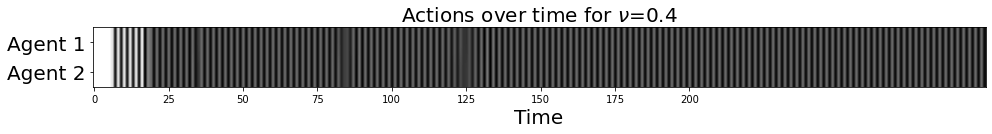

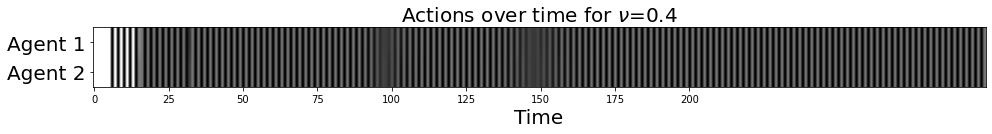

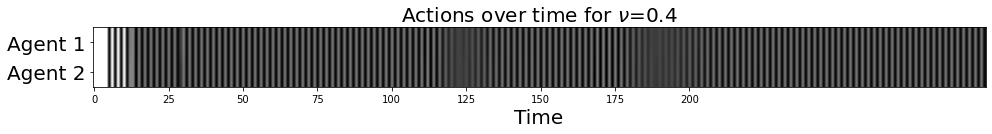

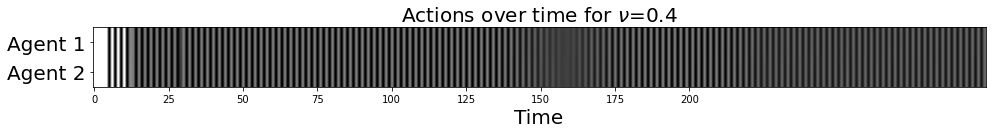

In [118]:

%matplotlib inline

fig, ax = plt.subplots(figsize = (16,5))

ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\nu$' + '=0.0',fontsize = 20
)
im = ax.imshow(actions_over_time_all[:,:,0].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
plt.savefig("Actions over time for 30.jpg")

plt.show()
fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\nu$' + '=0.1',fontsize = 20
)
im = ax.imshow(actions_over_time_all[:,:,1].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
plt.savefig("Actions over time for 35.jpg")

plt.show()
fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\nu$' + '=0.2',fontsize=20
)
im = ax.imshow(actions_over_time_all[:,:,2].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
plt.savefig("Actions over time for 39.jpg")

plt.show()


fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\nu$' + '=0.3',fontsize=20
)
im = ax.imshow(actions_over_time_all[:,:,3].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
plt.savefig("Actions over time for 40.jpg")

plt.show()



fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time_all[:,:,4].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\nu$' + '=0.4',fontsize=20
)
plt.savefig(f"Actions over time for 45.jpg")
plt.show()

fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time_all[:,:,5].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\nu$' + '=0.4',fontsize=20
)
plt.savefig(f"Actions over time for 45.jpg")
plt.show()


fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time_all[:,:,6].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\nu$' + '=0.4',fontsize=20
)
plt.savefig(f"Actions over time for 45.jpg")
plt.show()


fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time_all[:,:,7].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\nu$' + '=0.4',fontsize=20
)
plt.savefig(f"Actions over time for 45.jpg")
plt.show()


fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time_all[:,:,8].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\nu$' + '=0.4',fontsize=20
)
plt.savefig(f"Actions over time for 45.jpg")
plt.show()



In [ ]:
fix both learning rate and precision and see what happens with two different initial observations

make 'infinite' learning rate and use initial conditions to see if they fully determine the outcome 

In [2]:
import numpy as np

In [92]:
actions_over_time_all = np.load('p_sweep_4_to_10/actions_over_time_all.npy')
B1_over_time_all = np.load('p_sweep_4_to_10/B1_over_time_all.npy')
B2_over_time_all = np.load('p_sweep_4_to_10/B2_over_time_all.npy')
q_pi_over_time_all = np.load('p_sweep_4_to_10/q_pi_over_time_all.npy')

In [93]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [94]:
steady_state = np.zeros((8,3))

In [95]:
actions_over_time_all.shape

(300, 2, 8, 200)

In [ ]:
can you get cooperation if the precisions are equal to each other 

keep the precision asymmetry and only do learning on one or the other B matrix (set other uniform)

In [96]:
def is_oscillatory(vector):
    if (vector == np.zeros(vector.shape[0])).all() == True:
        return 0 
    if (vector == np.ones(vector.shape[0])).all() == True:
        return 1
    if ((vector == np.zeros(20))[::2]).all() == True or ((vector == np.ones(20))[::2]).all() == True:
        return 2
    

In [97]:
oscillations = []

num_oscillations = []
num_c = []
num_d = []

for k in range(8):
    num = 0
    c = 0
    d = 0
    for l in range(200):
        o = is_oscillatory(actions_over_time_all[-20:,0,k,l])
        if o == 2:
            num += 1 
        oscillations.append(o)
        if o == 0:
            c += 1
        if o == 1:
            d += 1
    steady_state[k] = [num,c,d]

In [98]:
import matplotlib.pyplot as plt

In [99]:
steady_state[:,2]

array([0., 0., 0., 0., 0., 0., 0., 0.])

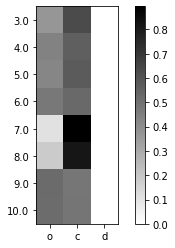

In [100]:
plt.imshow(steady_state/200,cmap=cmap0)
plt.xticks([0,1,2],labels=['o','c','d'])
plt.yticks(range(8), labels=[3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])

plt.colorbar()

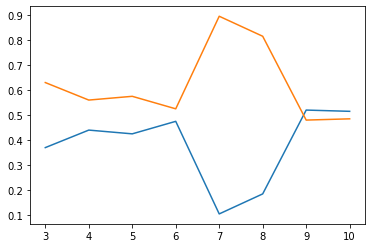

In [101]:
plt.plot(range(3,11), steady_state[:,0]/200)
plt.plot(range(3,11),steady_state[:,1]/200)

In [102]:
import seaborn as sns

In [103]:
B1_over_time_all = np.mean(B1_over_time_all,axis=-1)

/var/folders/2x/dzvt1f0n09536d7370hzpnv00000gn/T/ipykernel_58611/3628374848.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(['CC','CD','DC','DD'],fontsize =14)
/var/folders/2x/dzvt1f0n09536d7370hzpnv00000gn/T/ipykernel_58611/3628374848.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(['CC','CD'],fontsize =14)


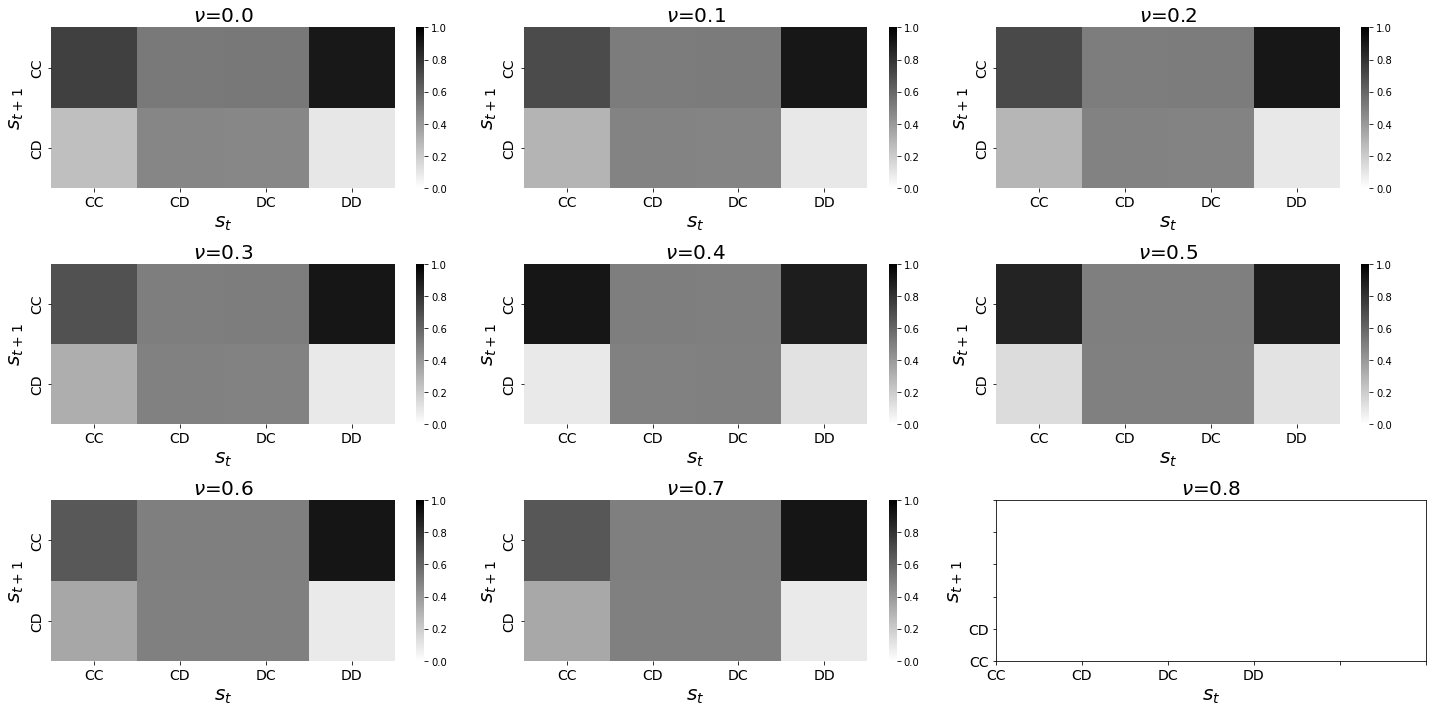

In [104]:
def set_labels(axis):
    axis.set_xticklabels(['CC','CD','DC','DD'],fontsize =14)
    axis.set_yticklabels(['CC','CD'],fontsize =14)
    axis.set_xlabel(r'$s_t$',fontsize =20)

    axis.set_ylabel(r'$s_{t+1}$',fontsize =20)

fig, ax = plt.subplots(3,3, figsize = (20,10))

img1 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,0],ax =ax[0,0], cmap = cmap0, vmin = 0, vmax =1)
img2 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,1],ax =ax[0,1], cmap = cmap0, vmin = 0, vmax =1)
img3 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,2],ax =ax[0,2], cmap = cmap0, vmin = 0, vmax =1)
img4 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,3],ax =ax[1,0], cmap = cmap0, vmin = 0, vmax =1)
img5 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,4],ax =ax[1,1], cmap = cmap0, vmin = 0, vmax =1)
img6 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,5],ax =ax[1,2], cmap = cmap0, vmin = 0, vmax =1)
img7 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,6],ax =ax[2,0], cmap = cmap0, vmin = 0, vmax =1)
img8 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,7],ax =ax[2,1], cmap = cmap0, vmin = 0, vmax =1)


ax[0,0].set_title(r'$\nu$' + '=0.0',fontsize =20)
ax[0,1].set_title(r'$\nu$' + '=0.1',fontsize =20)

ax[0,2].set_title(r'$\nu$' + '=0.2',fontsize =20)
ax[1,0].set_title(r'$\nu$' + '=0.3',fontsize =20)
ax[1,1].set_title(r'$\nu$' + '=0.4',fontsize =20)
ax[1,2].set_title(r'$\nu$' + '=0.5',fontsize =20)
ax[2,0].set_title(r'$\nu$' + '=0.6',fontsize =20)
ax[2,1].set_title(r'$\nu$' + '=0.7',fontsize =20)
ax[2,2].set_title(r'$\nu$' + '=0.8',fontsize =20)

set_labels(ax[0,0])
set_labels(ax[0,1])
set_labels(ax[0,2])
set_labels(ax[1,0])
set_labels(ax[1,1])
set_labels(ax[1,2])
set_labels(ax[2,0])
set_labels(ax[2,1])
set_labels(ax[2,2])
fig.tight_layout()
plt.savefig("Learned Transitions A matrix precision")



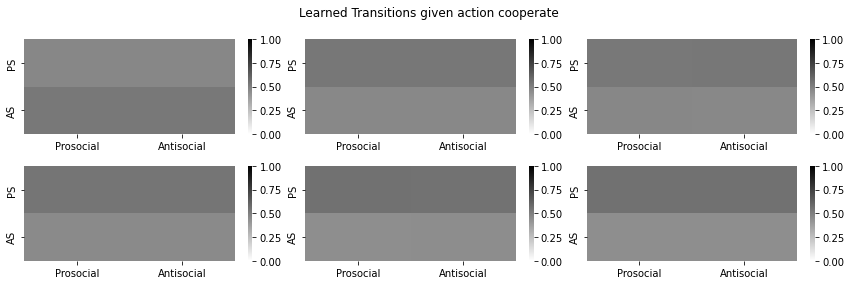

In [105]:
def set_labels(axis):
    axis.set_xticklabels(['Prosocial','Antisocial'])
    axis.set_yticklabels(['PS','AS'])

fig, ax = plt.subplots(2,3, figsize = (12,4))

img1 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,0,0],ax =ax[0,0], cmap = cmap0, vmin = 0, vmax =1)
img2 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,1,0],ax =ax[0,1], cmap = cmap0, vmin = 0, vmax =1)
img3 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,2,0],ax =ax[0,2], cmap = cmap0, vmin = 0, vmax =1)
img4 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,3,0],ax =ax[1,0], cmap = cmap0, vmin = 0, vmax =1)
img5 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,4,0],ax =ax[1,1], cmap = cmap0, vmin = 0, vmax =1)
img6 = sns.heatmap(B2_over_time_all[-1,:,:,0,0,5,0],ax =ax[1,2], cmap = cmap0, vmin = 0, vmax =1)
set_labels(ax[0,0])
set_labels(ax[0,1])
set_labels(ax[0,2])
set_labels(ax[1,0])
set_labels(ax[1,1])
set_labels(ax[1,2])
fig.tight_layout()

fig.suptitle("Learned Transitions given action cooperate")
fig.tight_layout()


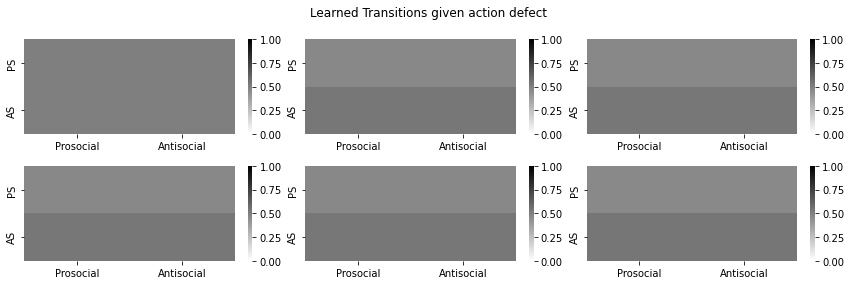

In [86]:
def set_labels(axis):
    axis.set_xticklabels(['Prosocial','Antisocial'])
    axis.set_yticklabels(['PS','AS'])

fig, ax = plt.subplots(2,3, figsize = (12,4))

img1 = sns.heatmap(B2_over_time_all[-1,:,:,1,0,0,0],ax =ax[0,0], cmap = cmap0, vmin = 0, vmax =1)
img2 = sns.heatmap(B2_over_time_all[-1,:,:,1,0,1,0],ax =ax[0,1], cmap = cmap0, vmin = 0, vmax =1)
img3 = sns.heatmap(B2_over_time_all[-1,:,:,1,0,2,0],ax =ax[0,2], cmap = cmap0, vmin = 0, vmax =1)
img4 = sns.heatmap(B2_over_time_all[-1,:,:,1,0,3,0],ax =ax[1,0], cmap = cmap0, vmin = 0, vmax =1)
img5 = sns.heatmap(B2_over_time_all[-1,:,:,1,0,4,0],ax =ax[1,1], cmap = cmap0, vmin = 0, vmax =1)
img6 = sns.heatmap(B2_over_time_all[-1,:,:,1,0,5,0],ax =ax[1,2], cmap = cmap0, vmin = 0, vmax =1)
set_labels(ax[0,0])
set_labels(ax[0,1])
set_labels(ax[0,2])
set_labels(ax[1,0])
set_labels(ax[1,1])
set_labels(ax[1,2])
fig.tight_layout()

fig.suptitle("Learned Transitions given action defect")
fig.tight_layout()


In [106]:
q_pi_over_time_all = np.mean(q_pi_over_time_all,axis=-1)

In [113]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

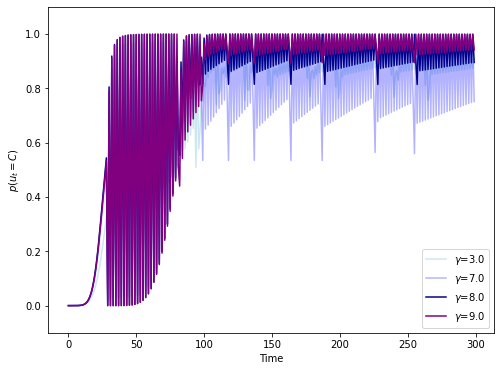

In [114]:
fig = plt.figure(figsize = (8,6))


plt.plot(q_pi_over_time_all[:,0,0,0],alpha=0.6, label = r'$\gamma$' + '=3.0', color = 'lightblue')
#plt.plot(q_pi_over_time_all[:,0,0,1],alpha=0.3, label = r'$\gamma$' + '=4.0', color = 'orange')
#plt.plot(q_pi_over_time_all[:,0,0,2],alpha=0.2, label = r'$\gamma$' + '=5.0')
#plt.plot(q_pi_over_time_all[:,0,0,3], alpha=0.2,  label = r'$\gamma$' + '=6.0')
plt.plot(q_pi_over_time_all[:,0,0,3],alpha=0.3, label =r'$\gamma$' + '=7.0', color = 'blue')
plt.plot(q_pi_over_time_all[:,0,0,5],color = 'darkblue', label= r'$\gamma$' + '=8.0')
plt.plot(q_pi_over_time_all[:,0,0,4],color = 'purple', label = r'$\gamma$' + '=9.0')
#plt.plot(q_pi_over_time_all[:,0,0,7], label = r'$\gamma$' + '=10.0')


plt.legend()
#plt.errorbar(range(200), q_pi_over_time_all[:,0,0,i,0], yerr=q_pi_over_time_all[:,0,0,i,1],alpha=0.5, ecolor = 'yellow')
plt.ylim(-0.1,1.1)
plt.xlabel("Time")
plt.ylabel(r'$p(u_t = C)$')
plt.savefig("Probability of cooperation over time")
plt.show()

In [56]:
actions_over_time_all = np.mean(actions_over_time_all,axis=-1)

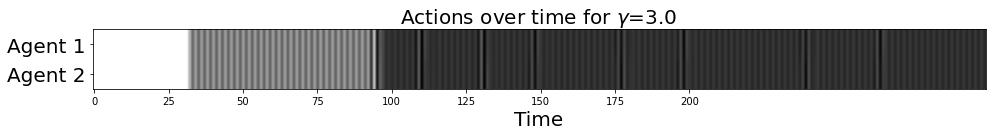

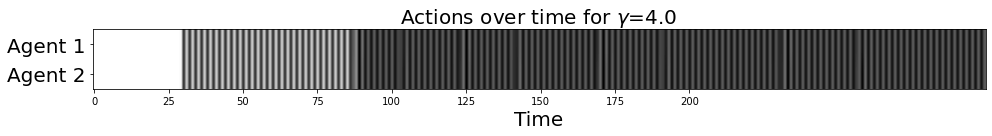

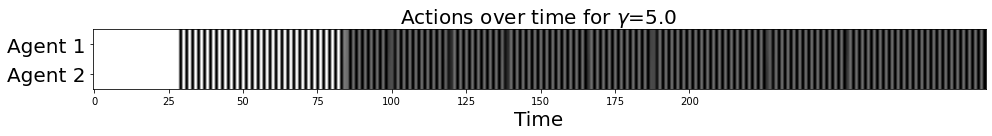

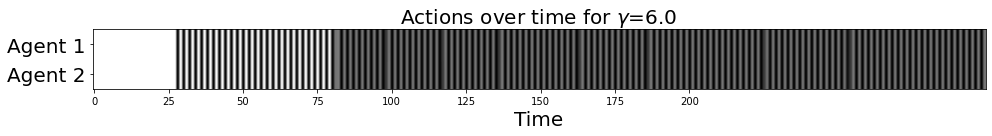

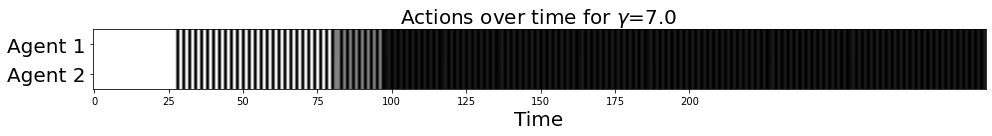

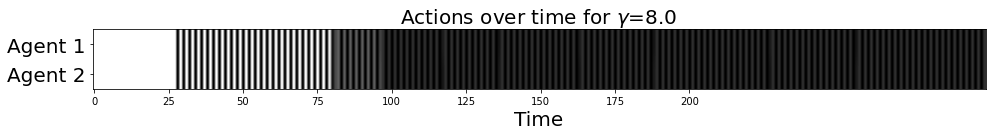

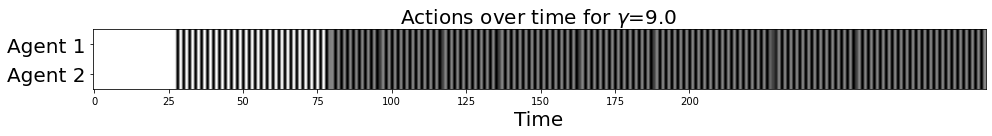

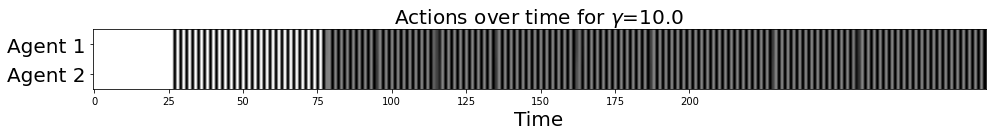

In [59]:

%matplotlib inline

fig, ax = plt.subplots(figsize = (16,5))

ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\gamma$' + '=3.0',fontsize = 20
)
im = ax.imshow(actions_over_time_all[:,:,0].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
plt.savefig("Actions over time for 30.jpg")

plt.show()
fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\gamma$' + '=4.0',fontsize = 20
)
im = ax.imshow(actions_over_time_all[:,:,1].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
plt.savefig("Actions over time for 35.jpg")

plt.show()
fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\gamma$' + '=5.0',fontsize=20
)
im = ax.imshow(actions_over_time_all[:,:,2].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
plt.savefig("Actions over time for 39.jpg")

plt.show()


fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\gamma$' + '=6.0',fontsize=20
)
im = ax.imshow(actions_over_time_all[:,:,3].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
plt.savefig("Actions over time for 40.jpg")

plt.show()



fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time_all[:,:,4].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\gamma$' + '=7.0',fontsize=20
)
plt.savefig(f"Actions over time for 45.jpg")
plt.show()

fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time_all[:,:,5].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\gamma$' + '=8.0',fontsize=20
)
plt.savefig(f"Actions over time for 45.jpg")
plt.show()


fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time_all[:,:,6].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\gamma$' + '=9.0',fontsize=20
)
plt.savefig(f"Actions over time for 45.jpg")
plt.show()


fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time_all[:,:,7].T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100,125,150,175,200],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.title(
    f"Actions over time for " + r'$\gamma$' + '=10.0',fontsize=20
)
plt.savefig(f"Actions over time for 45.jpg")
plt.show()





In [61]:
actions_over_time_all = np.load('lr_sweep/actions_over_time_all.npy')
B1_over_time_all = np.load('lr_sweep/B1_over_time_all.npy')
B2_over_time_all = np.load('lr_sweep/B2_over_time_all.npy')
q_pi_over_time_all = np.load('lr_sweep/q_pi_over_time_all.npy')

In [62]:
def is_oscillatory(vector):
    if (vector == np.zeros(vector.shape[0])).all() == True:
        return 0 
    if (vector == np.ones(vector.shape[0])).all() == True:
        return 1
    if ((vector == np.zeros(20))[::2]).all() == True or ((vector == np.ones(20))[::2]).all() == True:
        return 2
    

In [63]:
steady_state = np.zeros((8,3))

In [66]:
oscillations = []

num_oscillations = []
num_c = []
num_d = []

for k in range(8):
    num = 0
    c = 0
    d = 0
    for l in range(200):
        o = is_oscillatory(actions_over_time_all[-20:,0,k,l])
        if o == 2:
            num += 1 
        oscillations.append(o)
        if o == 0:
            c += 1
        if o == 1:
            d += 1
    steady_state[k] = [num,c,d]

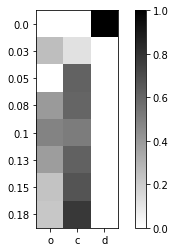

In [68]:
plt.imshow(steady_state/200,cmap=cmap0)
plt.xticks([0,1,2],labels=['o','c','d'])
plt.yticks(range(8), labels=[0.0,0.03,0.05,0.08,0.1,0.13,0.15,0.18])

plt.colorbar()

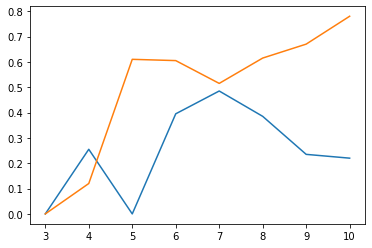

In [69]:
plt.plot([0.0,0.03,0.05,0.08,0.1,0.13,0.15,0.18], steady_state[:,0]/200)
plt.plot([0.0,0.03,0.05,0.08,0.1,0.13,0.15,0.18],steady_state[:,1]/200)

In [ ]:
B1_over_time_all = np.mean(B1_over_time_all,axis=-1)

In [ ]:
def set_labels(axis):
    axis.set_xticklabels(['CC','CD','DC','DD'],fontsize =14)
    axis.set_yticklabels(['CC','CD'],fontsize =14)
    axis.set_xlabel(r'$s_t$',fontsize =20)

    axis.set_ylabel(r'$s_{t+1}$',fontsize =20)

fig, ax = plt.subplots(3,3, figsize = (20,10))

img1 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,0],ax =ax[0,0], cmap = cmap0, vmin = 0, vmax =1)
img2 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,1],ax =ax[0,1], cmap = cmap0, vmin = 0, vmax =1)
img3 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,2],ax =ax[0,2], cmap = cmap0, vmin = 0, vmax =1)
img4 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,3],ax =ax[1,0], cmap = cmap0, vmin = 0, vmax =1)
img5 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,4],ax =ax[1,1], cmap = cmap0, vmin = 0, vmax =1)
img6 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,5],ax =ax[1,2], cmap = cmap0, vmin = 0, vmax =1)
img7 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,6],ax =ax[2,0], cmap = cmap0, vmin = 0, vmax =1)
img8 = sns.heatmap(B1_over_time_all[-1,:2,:,0,0,7],ax =ax[2,1], cmap = cmap0, vmin = 0, vmax =1)


ax[0,0].set_title(r'$\nu$' + '=0.0',fontsize =20)
ax[0,1].set_title(r'$\nu$' + '=0.1',fontsize =20)

ax[0,2].set_title(r'$\nu$' + '=0.2',fontsize =20)
ax[1,0].set_title(r'$\nu$' + '=0.3',fontsize =20)
ax[1,1].set_title(r'$\nu$' + '=0.4',fontsize =20)
ax[1,2].set_title(r'$\nu$' + '=0.5',fontsize =20)
ax[2,0].set_title(r'$\nu$' + '=0.6',fontsize =20)
ax[2,1].set_title(r'$\nu$' + '=0.7',fontsize =20)
ax[2,2].set_title(r'$\nu$' + '=0.8',fontsize =20)

set_labels(ax[0,0])
set_labels(ax[0,1])
set_labels(ax[0,2])
set_labels(ax[1,0])
set_labels(ax[1,1])
set_labels(ax[1,2])
set_labels(ax[2,0])
set_labels(ax[2,1])
set_labels(ax[2,2])
fig.tight_layout()
plt.savefig("Learned Transitions A matrix precision")

